In [3]:
# Lab17: Data Visualization B
##### Paul Leonard 12/1/2020

Importing data and libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("./ks-projects-201801.csv")

In [5]:

# sns.set?
df.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [6]:
# sns.set()

In [7]:
df.shape

(378661, 15)

In [8]:
df.describe

<bound method NDFrame.describe of                 ID                                               name  \
0       1000002330                    The Songs of Adelaide & Abullah   
1       1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2       1000004038                                     Where is Hank?   
3       1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4       1000011046  Community Film Project: The Art of Neighborhoo...   
...            ...                                                ...   
378656   999976400  ChknTruk Nationwide Charity Drive 2014 (Canceled)   
378657   999977640                                          The Tribe   
378658   999986353  Walls of Remedy- New lesbian Romantic Comedy f...   
378659   999987933                           BioDefense Education Kit   
378660   999988282                  Nou Renmen Ayiti!  We Love Haiti!   

               category main_category currency    deadline     goal  \
0                P

<AxesSubplot:xlabel='state', ylabel='count'>

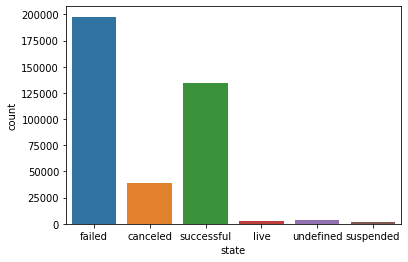

In [13]:
# sns.barplot(x="state",y="campaigns",data=df[["state"]])
sns.countplot(data=df[["state"]],x="state")
# ,ylabel="campaigns")

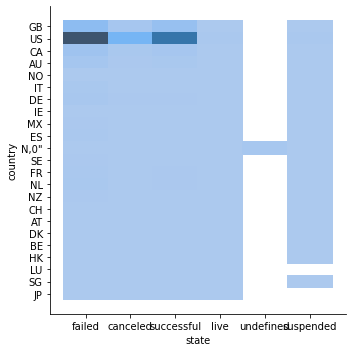

In [16]:
sns.displot(df, x="state", y="country")

<AxesSubplot:xlabel='country', ylabel='count'>

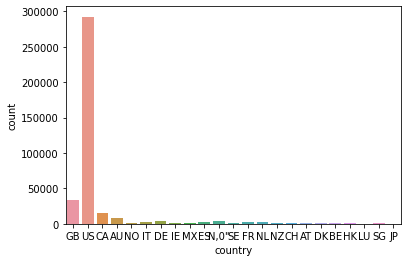

In [17]:
sns.countplot(data=df[["country"]],x="country")

In [21]:
# usdf = df[df["country"] == "US"]
usdf = df[df.country == "US"]
usdf.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.0


<AxesSubplot:xlabel='state', ylabel='count'>

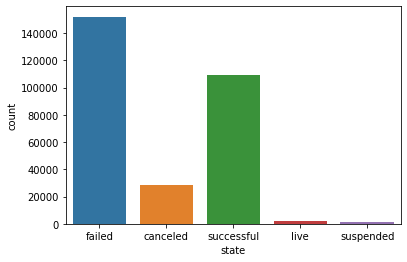

In [24]:
sns.countplot(data=usdf[["state"]],x="state")


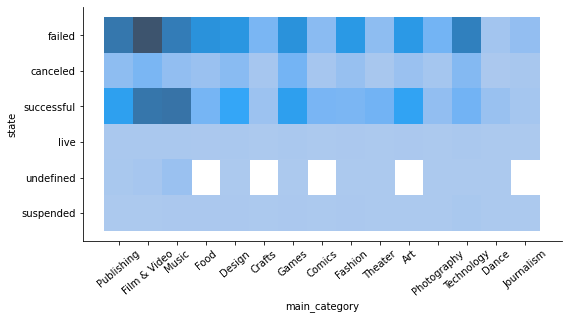

In [36]:
fig_size = (12,8)
heatmap = sns.displot(df, x="main_category", y="state", label="US Kickstarter Campaign Outcome Across Categories", height=4, aspect=2).set_titles("US Kickstarter")
heatmap.set_xticklabels(rotation=40)
heatmap.set_titles("US Kickstarter Campaign Outcome Across Categories")

# print()

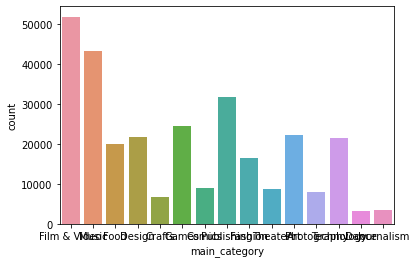

In [44]:
cat_histo = sns.countplot(data=usdf[["main_category"]],x="main_category",orient="h")
# cat_histo.set_xticklabels(rotation=40)
